## Example 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy as sp


In [2]:
N = np.load("MFCC_N.npy")
S = np.load("MFCC_S.npy")

In [3]:
S.shape

(5000, 60)

In [4]:
N.shape

(5000, 60)

In [5]:
# Finding Centroid
mS = np.mean(S, axis=0)
print (mS)
print(mS.shape)
mN = np.mean(N, axis=0)
print (mN)
print(mN.shape)


[-1.25995801e+00 -2.41262643e+00 -1.37380816e+00 -2.75987888e+00
 -1.29049751e+00 -1.57796544e+00 -1.44558631e+00 -1.36528003e+00
 -8.52013579e-01 -9.79454197e-03 -1.57688372e+00 -5.70433413e-01
 -3.67863782e-01 -1.08988892e+00 -4.29314615e-01  5.00350774e-02
 -6.77928168e-01 -3.09200853e-02  1.34823478e-01  9.65283781e-02
 -4.29406756e-03  2.80828913e-02  1.23635874e-02  2.17370939e-02
  1.50805638e-02  4.47657871e-03  8.70941963e-03 -1.11897178e-02
  4.56865204e-03 -1.77545483e-02  2.10973349e-03 -7.87633067e-03
 -1.41424586e-03  1.79944503e-04 -6.53908164e-03 -9.59333323e-03
 -1.27671016e-02 -1.41440168e-02 -2.02268967e-02 -1.23119175e-02
 -4.34882015e-03  4.68249014e-03  5.77922292e-03  6.39450958e-03
  1.50678366e-03 -1.02522154e-03 -1.35877218e-03 -5.96147257e-04
  6.61507139e-04 -2.25412360e-03  5.82518188e-04 -1.42934336e-04
 -5.20556165e-05 -1.34300076e-03  1.02178761e-04 -1.40119154e-04
 -3.58329399e-04  5.33972634e-04 -5.04398237e-04  3.27886515e-05]
(60,)
[-5.71919033e+00 -

In [6]:
# Finding Covariance
cS = np.cov(S.T)
print (cS)
print(cS.shape)
cN = np.cov(N.T)
print (cN)
print(cN.shape)

[[ 4.01816579e+00 -3.52651438e-01 -2.47486179e+00 ...  1.32173263e-02
   2.80149909e-03  7.79689030e-03]
 [-3.52651438e-01  8.38441416e+00  2.09117278e+00 ...  3.06460659e-03
   5.82239271e-03 -4.33164156e-03]
 [-2.47486179e+00  2.09117278e+00  4.56047345e+00 ... -7.69728766e-03
   7.23777558e-04 -8.78222958e-03]
 ...
 [ 1.32173263e-02  3.06460659e-03 -7.69728766e-03 ...  4.12337698e-03
   1.00416185e-03  5.55617054e-04]
 [ 2.80149909e-03  5.82239271e-03  7.23777558e-04 ...  1.00416185e-03
   4.07544969e-03  7.38998739e-04]
 [ 7.79689030e-03 -4.33164156e-03 -8.78222958e-03 ...  5.55617054e-04
   7.38998739e-04  3.45880172e-03]]
(60, 60)
[[ 7.36475613e+00  9.13008268e-01 -2.09734880e+00 ... -2.35532909e-02
  -1.06132959e-02 -1.05406654e-02]
 [ 9.13008268e-01  6.26794286e+00  1.03840729e+00 ... -1.46518722e-02
  -9.21121884e-03 -1.19364798e-02]
 [-2.09734880e+00  1.03840729e+00  3.71755205e+00 ...  4.23005781e-03
   7.12463063e-03  7.31867728e-04]
 ...
 [-2.35532909e-02 -1.46518722e-02  

In [7]:
# Compute Optimal Direction vector 
mudiff = mN - mS

X = np.append(N,S,axis=0)

mu = np.mean(X,axis=0)

Sw = cN + cS

C = np.cov(X.T,bias=True)

u = np.matmul(np.linalg.inv(Sw),mudiff)
u = np.matrix(u)

Ucap = u / np.linalg.norm(u)         # LDA unit Vector
print("----- Unit Vector -----")
print(Ucap)
Ucap.shape

----- Unit Vector -----
[[-0.05013247 -0.02059452 -0.01147756 -0.00076913  0.020969    0.03169092
   0.02056796  0.05929642 -0.00243547  0.02406555  0.06233557  0.02164728
   0.03385221  0.01278151  0.05648473 -0.04961829  0.08909274 -0.03341232
   0.05157907 -0.03478414  0.00554002  0.00273071 -0.00941994  0.02006019
   0.0062669  -0.00815022 -0.00302164 -0.01945601 -0.01438128 -0.04405062
   0.00389541  0.00458378 -0.05268316  0.03480734 -0.01620402 -0.01436791
  -0.00345099  0.0043939   0.00400961 -0.01123724 -0.29476108 -0.13029349
  -0.06464455  0.02897804  0.14512398  0.21297685  0.11160177  0.23896296
   0.02695199  0.10490741  0.32085395  0.1062125   0.19659521  0.11972019
   0.3170081  -0.25783691  0.49174749 -0.13488922  0.28860523 -0.15750495]]


(1, 60)

In [8]:
eigenValue,eigenVector = np.linalg.eig(C)
print("----- Eigen Value -----")
print(eigenValue)
print("----- Eigen Vector -----")
print(eigenVector)

----- Eigen Value -----
[1.77802842e+01 1.01674584e+01 3.48546971e+00 2.38191014e+00
 2.24584378e+00 2.07714678e+00 1.60262973e+00 1.34684482e+00
 1.12608059e+00 8.88795725e-01 7.90734030e-01 6.66741409e-01
 6.28720025e-01 5.27489703e-01 4.55301409e-01 4.13215366e-01
 3.87542037e-01 3.62997754e-01 3.05786475e-01 2.77430988e-01
 2.41591208e-01 2.13818391e-01 1.27855273e-01 1.20463715e-01
 1.14605429e-01 9.12316575e-02 7.48389436e-02 6.43390606e-02
 5.86808554e-02 5.43398643e-02 4.85826577e-02 4.33772158e-02
 3.95813934e-02 3.55367983e-02 3.32907115e-02 3.19090874e-02
 2.90285824e-02 2.70274160e-02 2.46573537e-02 2.27655392e-02
 1.93249759e-02 1.63953825e-02 1.44421145e-02 1.37392574e-02
 1.27246779e-02 9.65080734e-03 7.74677867e-03 7.54796276e-03
 6.92142504e-03 6.41642618e-03 5.45746432e-03 4.89249236e-03
 1.97240326e-03 2.10311251e-03 4.08697758e-03 3.97680343e-03
 3.66690532e-03 2.68698873e-03 2.64306298e-03 3.11591339e-03]
----- Eigen Vector -----
[[ 6.32685993e-01  5.40446263e-01 -

In [9]:
zN = N @ Ucap.T
print (zN)
zN.shape

[[0.0897243 ]
 [0.14824091]
 [0.21655072]
 ...
 [0.68304663]
 [0.70418034]
 [0.71242595]]


(5000, 1)

In [10]:
zS = S @ Ucap.T
print (zS)
zS.shape

[[-0.16455294]
 [-0.14786555]
 [-0.06188206]
 ...
 [-0.49095189]
 [-0.49541665]
 [-0.50690383]]


(5000, 1)

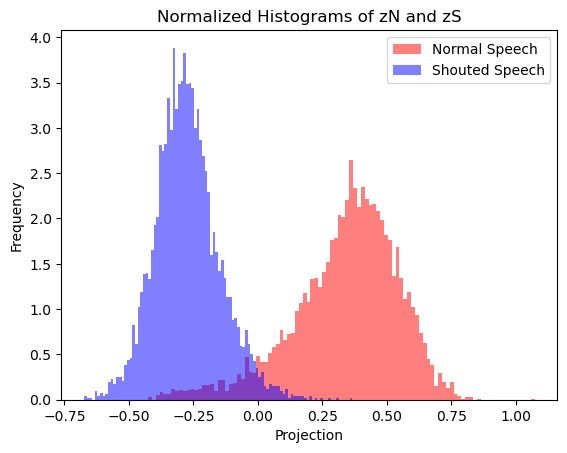

In [14]:
# Plot the histograms.
plt.figure()
plt.hist(zN, bins = 100, density = True, color='r', alpha = 0.5, label='Normal Speech')
plt.hist(zS, bins = 100, density = True, color='b', alpha = 0.5, label='Shouted Speech')

# Set the title and labels.
plt.title('Normalized Histograms of zN and zS')
plt.xlabel('Projection')
plt.ylabel('Frequency')
plt.legend()

# Show the plot.
plt.show()